# Final Capstone Project

This notebbok will be mainly devoted to the final Coursera capstone project

In [319]:
import pandas as pd
import numpy as np

# Explore and cluster the neighborhoods in Zürich

1. Read the data from the 'Stadt Zürich' webpage using the pandas read_excel function
2. Save the data in a pandas dataframe with neighbourhood and population data for 2020
3. Rename the columns 
4. Filter out the rows which contain entire 'Kreis' information and retain only the 34 single neighbourhoods
5. Print out the table and its shape

In [320]:
url = 'https://www.stadt-zuerich.ch/content/dam/stzh/prd/Deutsch/Statistik/Themen/Bevoelkerung/BEV321T3211_Auslaenderanteil_Bevoelkerung_nach-Herkunft-Stadtkreis-Stadtquartier.xlsx'
xls_data = pd.ExcelFile(url)
df1 = pd.read_excel(xls_data, '2020', skiprows = 8)
df1.columns = ["Neighbourhood",
               "Total",
               'Swiss',
               'Foreigner',
               'Foreigner Percentage']
df1 = df1[~df1.Neighbourhood.str.contains("Kreis", na=False)]
df1 = df1[~df1.Neighbourhood.str.contains("Ganze", na=False)].reset_index(drop = True)
df1

,Neighbourhood,Total,Swiss,Foreigner,Foreigner Percentage
0,Rathaus,3317,2296,1021,30.8
1,Hochschulen,675,464,211,31.3
2,Lindenhof,1010,715,295,29.2
3,City,829,567,262,31.6
4,Wollishofen,19757,13816,5941,30.1
5,Leimbach,6140,4113,2027,33.0
6,Enge,9655,6104,3551,36.8
7,Alt-Wiedikon,17764,11707,6057,34.1
8,Friesenberg,11071,9040,2031,18.3
9,Sihlfeld,21921,15118,6803,31.0


In [321]:
df1.shape

(34, 5)

# Longitude and Latitude coordinates

1. Use the geopy library to assign coordinates to each of the Zürich neighbourhoods
2. Loop over the different neighbourhoods and find the coordinates
3. Add the columns 'Latitude' and 'Longitude' to the data frame and visualize it 

In [322]:
import geopy
from geopy.geocoders import Nominatim

In [323]:
lat = []
long = []

for neigh in df1.Neighbourhood:
    address = neigh + ' Bezirk Zürich'
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    #print(location.address)
    #print((location.latitude, location.longitude))
    lat.append(location.latitude)
    long.append(location.longitude)

df1['Latitude'] = lat
df1['Longitude'] = long

In [324]:
df1

,Neighbourhood,Total,Swiss,Foreigner,Foreigner Percentage,Latitude,Longitude
0,Rathaus,3317,2296,1021,30.8,47.372649,8.544311
1,Hochschulen,675,464,211,31.3,47.373846,8.548613
2,Lindenhof,1010,715,295,29.2,47.372996,8.540799
3,City,829,567,262,31.6,47.372943,8.535346
4,Wollishofen,19757,13816,5941,30.1,47.342427,8.530708
5,Leimbach,6140,4113,2027,33.0,47.330511,8.512539
6,Enge,9655,6104,3551,36.8,47.361789,8.528708
7,Alt-Wiedikon,17764,11707,6057,34.1,47.365562,8.517851
8,Friesenberg,11071,9040,2031,18.3,47.354922,8.500523
9,Sihlfeld,21921,15118,6803,31.0,47.373218,8.510820


# Clustering

1. Select all 34 Zürich boroughs
2. Visualize Zürich's map using folium
3. Identify venues associated to each neighbourhood
4. Analyze each neighbourhood
5. Clustering
6. Examine clusters

## 1. Select boroughs

In [325]:
import folium
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [327]:
zurich_neighborhoods = df1
zurich_neighborhoods.head()

,Neighbourhood,Total,Swiss,Foreigner,Foreigner Percentage,Latitude,Longitude
0,Rathaus,3317,2296,1021,30.8,47.372649,8.544311
1,Hochschulen,675,464,211,31.3,47.373846,8.548613
2,Lindenhof,1010,715,295,29.2,47.372996,8.540799
3,City,829,567,262,31.6,47.372943,8.535346
4,Wollishofen,19757,13816,5941,30.1,47.342427,8.530708


## 2. Visualize Zürich map

In [328]:
#Find Zürich coordinates
address = 'Zürich, Switzerland'

geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Zürich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Zürich are 47.3744489, 8.5410422.


In [329]:
#Create map of Zürich and its neighbourhoods using latitude and longitude values
map_zurich = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(zurich_neighborhoods['Latitude'], zurich_neighborhoods['Longitude'], zurich_neighborhoods['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zurich)  
    
map_zurich

## 3. Identify venues

In [330]:
#Variables to get Zurich venues
CLIENT_ID = 'FUD3UCOJBKTSIZHTKCLFA55JVWQFMOVENUFLNMURETLLETHD' # your Foursquare ID
CLIENT_SECRET = 'BAIDEQGV3WJ01EYA4IXSJ3C12LXV51EKZCUEVZHW5R1OQYOK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FUD3UCOJBKTSIZHTKCLFA55JVWQFMOVENUFLNMURETLLETHD
CLIENT_SECRET:BAIDEQGV3WJ01EYA4IXSJ3C12LXV51EKZCUEVZHW5R1OQYOK


In [331]:
#Same function used during the course
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [332]:
#list Zürich's venues
zurich_venues = getNearbyVenues(names=zurich_neighborhoods['Neighbourhood'],
                                   latitudes=zurich_neighborhoods['Latitude'],
                                   longitudes=zurich_neighborhoods['Longitude']
                                  )

Rathaus
Hochschulen
Lindenhof
City
Wollishofen
Leimbach
Enge
Alt-Wiedikon
Friesenberg
Sihlfeld
Werd
Langstrasse
Hard
Gewerbeschule
Escher Wyss
Unterstrass
Oberstrass
Fluntern
Hottingen
Hirslanden
Witikon
Seefeld
Mühlebach
Weinegg
Albisrieden
Altstetten
Höngg
Wipkingen
Affoltern
Oerlikon
Seebach
Saatlen
Schwamendingen-Mitte
Hirzenbach


In [333]:
print(zurich_venues.shape)
zurich_venues.head()

(1065, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rathaus,47.372649,8.544311,Fitnesspark Münstergasse,47.370888,8.544999,Gym / Fitness Center
1,Rathaus,47.372649,8.544311,Schwarzenbach Kolonialwaren,47.371444,8.544091,Gourmet Shop
2,Rathaus,47.372649,8.544311,Café Schober,47.371400,8.544149,Café
3,Rathaus,47.372649,8.544311,Neumarkt 17 AG,47.372868,8.546121,Furniture / Home Store
4,Rathaus,47.372649,8.544311,Louis Take Away,47.373037,8.543776,Diner


In [334]:
#Count how many venues for each neighbourhood
zurich_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Affoltern,13,13,13,13,13,13
Albisrieden,8,8,8,8,8,8
Alt-Wiedikon,19,19,19,19,19,19
Altstetten,25,25,25,25,25,25
City,63,63,63,63,63,63
Enge,37,37,37,37,37,37
Escher Wyss,71,71,71,71,71,71
Fluntern,15,15,15,15,15,15
Friesenberg,2,2,2,2,2,2


In [335]:
print('There are {} unique categories.'.format(len(zurich_venues['Venue Category'].unique())))

There are 175 unique categories.


## 4. Analyze each neighbourhood

In [336]:
#Follows similar logic as explained during the course

# one hot encoding
zurich_onehot = pd.get_dummies(zurich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
zurich_onehot['Neighborhood'] = zurich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [zurich_onehot.columns[-1]] + list(zurich_onehot.columns[:-1])
zurich_onehot = zurich_onehot[fixed_columns]

zurich_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rathaus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [337]:
zurich_onehot.shape

(1065, 176)

In [338]:
#Group by neighbourhood and calculate the mean of each category to prepare for clustering 
zurich_grouped = zurich_onehot.groupby('Neighborhood').mean().reset_index()
zurich_grouped

,Neighborhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Affoltern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Albisrieden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,Alt-Wiedikon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,...,0.000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Altstetten,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,City,0.000000,0.000000,0.015873,0.000000,0.015873,0.015873,0.000000,0.000000,0.000000,...,0.000,0.000000,0.031746,0.000000,0.015873,0.000000,0.000000,0.015873,0.00,0.000000
5,Enge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.027027
6,Escher Wyss,0.000000,0.000000,0.000000,0.000000,0.028169,0.000000,0.000000,0.000000,0.014085,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,Fluntern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,Friesenberg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Gewerbeschule,0.016667,0.000000,0.000000,0.016667,0.000000,0.000000,0.050000,0.000000,0.000000,...,0.000,0.016667,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.00,0.016667


In [339]:
zurich_grouped.shape

(34, 176)

In [340]:
#Function from the course
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [341]:
#Identify most common venues for each neighbourhood - as done in the course

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = zurich_grouped['Neighborhood']

for ind in np.arange(zurich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zurich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Affoltern,Supermarket,Bus Station,Athletics & Sports,Grocery Store,Train Station,Diner,Gym / Fitness Center,Department Store,Italian Restaurant,Hotel
1,Albisrieden,Bus Station,Scenic Lookout,Grocery Store,Supermarket,Swiss Restaurant,Café,Trattoria/Osteria,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,Alt-Wiedikon,Restaurant,Italian Restaurant,Farmers Market,Beer Garden,Supermarket,Thai Restaurant,Diner,Bakery,Light Rail Station,Asian Restaurant
3,Altstetten,Supermarket,Plaza,Swiss Restaurant,Paper / Office Supplies Store,Hotel,Discount Store,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Mexican Restaurant
4,City,Italian Restaurant,Bar,Plaza,Swiss Restaurant,Cocktail Bar,Restaurant,Department Store,Vegetarian / Vegan Restaurant,Lounge,Hotel


## 5. Clustering

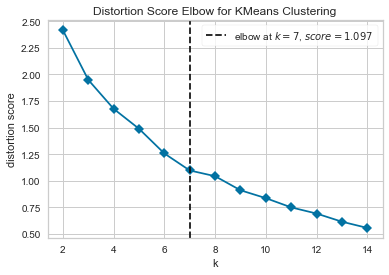

In [344]:
#Find optimal number of clusters using the elbow method
zurich_grouped_clustering = zurich_grouped.drop('Neighborhood', 1)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings=False)

visualizer.fit(zurich_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [345]:
# set number of clusters
kclusters = 7

zurich_grouped_clustering = zurich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zurich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 2, 2, 2, 2, 1, 3, 2], dtype=int32)

In [346]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [347]:
zurich_merged = zurich_neighborhoods.rename(columns={"Neighbourhood": "Neighborhood"})

# merge with zurich_neighborhoods to add latitude/longitude for each neighborhood
zurich_merged = zurich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

zurich_merged.head() # check the last columns!

,Neighborhood,Total,Swiss,Foreigner,Foreigner Percentage,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rathaus,3317,2296,1021,30.8,47.372649,8.544311,2,Swiss Restaurant,Café,Bar,Boutique,Italian Restaurant,Restaurant,French Restaurant,Plaza,Hotel,Pedestrian Plaza
1,Hochschulen,675,464,211,31.3,47.373846,8.548613,2,Café,Hotel,Swiss Restaurant,Bar,Tram Station,Italian Restaurant,Restaurant,Plaza,Science Museum,Cupcake Shop
2,Lindenhof,1010,715,295,29.2,47.372996,8.540799,2,Swiss Restaurant,Café,Plaza,Department Store,Hotel,French Restaurant,Bar,Restaurant,Lounge,Cocktail Bar
3,City,829,567,262,31.6,47.372943,8.535346,2,Italian Restaurant,Bar,Plaza,Swiss Restaurant,Cocktail Bar,Restaurant,Department Store,Vegetarian / Vegan Restaurant,Lounge,Hotel
4,Wollishofen,19757,13816,5941,30.1,47.342427,8.530708,1,Supermarket,Tram Station,Salon / Barbershop,Restaurant,Swiss Restaurant,Cheese Shop,Music Venue,Bus Station,Irish Pub,Plaza


In [348]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zurich_merged['Latitude'], zurich_merged['Longitude'], zurich_merged['Neighborhood'], zurich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 6. Examine clusters

In [349]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 0, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,11244,47.358310,8.590628,0,Bus Station,Discount Store,Church,Supermarket,Shoe Store,Grocery Store,Bakery,Tram Station,Indian Restaurant,Department Store
23,5562,47.351058,8.569910,0,Grocery Store,Bus Station,Restaurant,Modern European Restaurant,Yoga Studio,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
24,22364,47.374857,8.484657,0,Bus Station,Scenic Lookout,Grocery Store,Supermarket,Swiss Restaurant,Café,Trattoria/Osteria,Fast Food Restaurant,Farmers Market,Falafel Restaurant
28,26584,47.418762,8.507186,0,Supermarket,Bus Station,Athletics & Sports,Grocery Store,Train Station,Diner,Gym / Fitness Center,Department Store,Italian Restaurant,Hotel


In [350]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 1, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,19757,47.342427,8.530708,1,Supermarket,Tram Station,Salon / Barbershop,Restaurant,Swiss Restaurant,Cheese Shop,Music Venue,Bus Station,Irish Pub,Plaza
16,10824,47.385706,8.549124,1,Tram Station,Hotel,Italian Restaurant,Bus Station,Supermarket,Bakery,Swiss Restaurant,Theater,Hill,Medical Supply Store
17,8685,47.376777,8.558775,1,Tram Station,Plaza,Grocery Store,Bakery,Bus Station,Supermarket,Café,Gastropub,Department Store,Food
19,7396,47.362948,8.564269,1,Tram Station,Plaza,Italian Restaurant,Hotel,Mediterranean Restaurant,Pizza Place,Steakhouse,Swiss Restaurant,Bus Station,Park


In [351]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 2, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3317,47.372649,8.544311,2,Swiss Restaurant,Café,Bar,Boutique,Italian Restaurant,Restaurant,French Restaurant,Plaza,Hotel,Pedestrian Plaza
1,675,47.373846,8.548613,2,Café,Hotel,Swiss Restaurant,Bar,Tram Station,Italian Restaurant,Restaurant,Plaza,Science Museum,Cupcake Shop
2,1010,47.372996,8.540799,2,Swiss Restaurant,Café,Plaza,Department Store,Hotel,French Restaurant,Bar,Restaurant,Lounge,Cocktail Bar
3,829,47.372943,8.535346,2,Italian Restaurant,Bar,Plaza,Swiss Restaurant,Cocktail Bar,Restaurant,Department Store,Vegetarian / Vegan Restaurant,Lounge,Hotel
6,9655,47.361789,8.528708,2,Hotel,Bar,Italian Restaurant,Tram Station,Supermarket,History Museum,Plaza,Swiss Restaurant,Bus Station,Steakhouse
7,17764,47.365562,8.517851,2,Restaurant,Italian Restaurant,Farmers Market,Beer Garden,Supermarket,Thai Restaurant,Diner,Bakery,Light Rail Station,Asian Restaurant
9,21921,47.373218,8.510820,2,Café,Italian Restaurant,Bar,Plaza,Supermarket,Tapas Restaurant,Creperie,Hotel,Coffee Shop,Cocktail Bar
10,4570,47.371991,8.526782,2,Bar,Swiss Restaurant,Restaurant,Italian Restaurant,Coffee Shop,Thai Restaurant,Sushi Restaurant,Bakery,Soup Place,Japanese Restaurant
11,11910,47.375903,8.525326,2,Swiss Restaurant,Bar,Italian Restaurant,Restaurant,Café,Thai Restaurant,Chinese Restaurant,Nightclub,Pizza Place,Vegetarian / Vegan Restaurant
12,12554,47.381743,8.512554,2,Hotel,Plaza,Swiss Restaurant,Mediterranean Restaurant,Café,Gym / Fitness Center,Italian Restaurant,Food Truck,Fast Food Restaurant,Outdoors & Recreation


In [352]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 3, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,11071,47.354922,8.500523,3,Stables,Tennis Court,Ethiopian Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory


In [353]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 4, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,12963,47.402204,8.587687,4,Tram Station,Steakhouse,Furniture / Home Store,Ethiopian Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [354]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 5, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,8799,47.410987,8.563383,5,Bus Station,Supermarket,Arts & Crafts Store,Kebab Restaurant,Bagel Shop,Event Space,Food Truck,Food & Drink Shop,Food,Flea Market


In [357]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 6, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Total,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,6140,47.330511,8.512539,6,Trail,Moroccan Restaurant,Gas Station,Tennis Court,Grocery Store,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [358]:
zurich_merged

,Neighborhood,Total,Swiss,Foreigner,Foreigner Percentage,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rathaus,3317,2296,1021,30.8,47.372649,8.544311,2,Swiss Restaurant,Café,Bar,Boutique,Italian Restaurant,Restaurant,French Restaurant,Plaza,Hotel,Pedestrian Plaza
1,Hochschulen,675,464,211,31.3,47.373846,8.548613,2,Café,Hotel,Swiss Restaurant,Bar,Tram Station,Italian Restaurant,Restaurant,Plaza,Science Museum,Cupcake Shop
2,Lindenhof,1010,715,295,29.2,47.372996,8.540799,2,Swiss Restaurant,Café,Plaza,Department Store,Hotel,French Restaurant,Bar,Restaurant,Lounge,Cocktail Bar
3,City,829,567,262,31.6,47.372943,8.535346,2,Italian Restaurant,Bar,Plaza,Swiss Restaurant,Cocktail Bar,Restaurant,Department Store,Vegetarian / Vegan Restaurant,Lounge,Hotel
4,Wollishofen,19757,13816,5941,30.1,47.342427,8.530708,1,Supermarket,Tram Station,Salon / Barbershop,Restaurant,Swiss Restaurant,Cheese Shop,Music Venue,Bus Station,Irish Pub,Plaza
5,Leimbach,6140,4113,2027,33.0,47.330511,8.512539,6,Trail,Moroccan Restaurant,Gas Station,Tennis Court,Grocery Store,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
6,Enge,9655,6104,3551,36.8,47.361789,8.528708,2,Hotel,Bar,Italian Restaurant,Tram Station,Supermarket,History Museum,Plaza,Swiss Restaurant,Bus Station,Steakhouse
7,Alt-Wiedikon,17764,11707,6057,34.1,47.365562,8.517851,2,Restaurant,Italian Restaurant,Farmers Market,Beer Garden,Supermarket,Thai Restaurant,Diner,Bakery,Light Rail Station,Asian Restaurant
8,Friesenberg,11071,9040,2031,18.3,47.354922,8.500523,3,Stables,Tennis Court,Ethiopian Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory
9,Sihlfeld,21921,15118,6803,31.0,47.373218,8.510820,2,Café,Italian Restaurant,Bar,Plaza,Supermarket,Tapas Restaurant,Creperie,Hotel,Coffee Shop,Cocktail Bar
